# Análise de produtos Amazon Prime
Pedro Lucas | pedro.pessoal14@gmail.com

# Objetivos para 2021
- A Amazon Prime quer em 2021 ser a plataforma principal para 60% dos usuários de streaming no Brasil.
- Quer que o seu catálogo seja o diferencial para esta decisão do assinante.
- E aposta no público-alvo com idade superior a 30 anos

## Comparação de catálogos
Visto que a Amazon Prime deseja que seu catálogo seja o fator principal para atingir seus objetivos, vamos comparar o catálogo do Prime Video com seus concorrentes:

In [1]:
import pandas as pd

In [2]:
filmes = pd.read_excel('MoviesOnStreamingPlatforms_updated.xlsx', index_col=0)

In [3]:
filmes = filmes.rename(columns={'Prime Video': 'PrimeVideo'})
filmes.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,PrimeVideo,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,0.96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
# gêneros mais produzidos
filmes['Genres'].value_counts()

Drama                                  1341
Documentary                            1229
Comedy                                 1040
Comedy,Drama                            446
Horror                                  436
                                       ... 
Action,Comedy,Crime,Drama,Mystery         1
Biography,Drama,Romance,War,Western       1
Fantasy,Horror,Romance                    1
Sci-Fi,Drama                              1
Animation,Comedy,Talk-Show                1
Name: Genres, Length: 1909, dtype: int64

In [5]:
# contagem de filmes disponíveis no Netflix
# 0 representa filmes NÃO disponíveis
# 1 representa filmes DISPONÍVEIS
filmes['Netflix'].value_counts()

0    13184
1     3560
Name: Netflix, dtype: int64

In [6]:
# contagem de filmes disponíveis no Hulu
filmes['Hulu'].value_counts()

0    15841
1      903
Name: Hulu, dtype: int64

In [7]:
# contagem de filmes disponíveis no Prime Video
filmes['PrimeVideo'].value_counts()

1    12354
0     4390
Name: PrimeVideo, dtype: int64

In [8]:
# contagem de filmes disponíveis no Disney+
filmes['Disney+'].value_counts()

0    16180
1      564
Name: Disney+, dtype: int64

Percebe-se que o catálogo do Prime Video é consideravelmente maior que o de todos seus concorrentes. Então, por que ainda não é a plataforma principal para os usuários de streaming?

A fim de compreender isto, vamos comparar o serviço do Prime Video com seu maior concorrente: Netflix.

## Concorrência  entre Netflix e Prime Video

In [9]:
avaliacaoIMDb = ['ID','Title', 'IMDb']
avaliacaoRotten = ['ID','Title','Rotten Tomatoes']
concorrencia = ['ID','Title', 'Netflix', 'PrimeVideo']

In [10]:
# tabela mais limpa apenas com Netflix e Prime
filmesConcorrente = filmes.filter(items=concorrencia)
filmesConcorrente.head()

,ID,Title,Netflix,PrimeVideo
0,1,Inception,1,0
1,2,The Matrix,1,0
2,3,Avengers: Infinity War,1,0
3,4,Back to the Future,1,0
4,5,"The Good, the Bad and the Ugly",1,1


Uma forma de comparar esses dois serviços é partir da suposição de que o streaming que possui uma maior quantidade de filmes mais bem avaliados pela crítica é o mais popular. Analisando os melhores filmes segundo o IMDb e Rotten Tomatoes:

In [11]:
# 1000 filmes mais bem avaliados pelo IMDb:
filmesIMDb = filmes.filter(items=avaliacaoIMDb)
milFilmesIMDb = filmesIMDb.sort_values(by='IMDb', ascending=False).dropna().head(1000)
milFilmesIMDb

,ID,Title,IMDb
1292,1293,My Next Guest with David Letterman and Shah Ru...,9.3
7220,7221,"Down, But Not Out!",9.3
6566,6567,Square One,9.3
5110,5111,Love on a Leash,9.3
6837,6838,Steven Banks: Home Entertainment Center,9.3
...,...,...,...
12099,12100,"He Say, She Say, But What Does God Say?",7.7
12075,12076,Big in Bollywood,7.7
9932,9933,Vietnam: American Holocaust,7.7
1296,1297,Inuyasha the Movie 3: Swords of an Honorable R...,7.7


In [12]:
# 1000 filmes mais bem avaliados pelo Rotten Tomatoes:
filmesRotten = filmes.filter(items=avaliacaoRotten)
milFilmesRotten = filmesRotten.sort_values(by='Rotten Tomatoes', ascending=False).dropna().head(1000)
milFilmesRotten

,ID,Title,Rotten Tomatoes
481,482,Dance Academy: The Movie,1.00
828,829,National Bird,1.00
6507,6508,The Shelter,1.00
5249,5250,The Blood Is at the Doorstep,1.00
3845,3846,Food Evolution,1.00
...,...,...,...
396,397,The Sapphires,0.91
3989,3990,Killing Them Safely,0.91
20,21,There Will Be Blood,0.91
38,39,Like Stars on Earth,0.91


In [13]:
avaliadores = [milFilmesIMDb, milFilmesRotten]
plataformas = ['Netflix', 'PrimeVideo']
nomesAvaliadores = ['IMDb', 'Rotten']

In [14]:
# quantos dos  1000 filmes mais bem avaliados pelo IMDb e Rotten Tomatoes 
# estão disponíveis na netflix e prime video

tabela = {'Plataforma': plataformas}

colunas = []
for avaliador in avaliadores:
    qplat = []
    for plat in plataformas:
        lista = []
        for i in avaliador['ID']:
            for d in filmesConcorrente['ID']:
                if i == d and filmesConcorrente[plat][int(i)] == 1:
                    lista.append(filmesConcorrente.iloc[[int(i)]])
        
        qplat.append(len(lista))
        
    colunas.append(qplat)
      
tabela['IMDb'] = colunas[0]
tabela['Rotten'] = colunas[1]

plataformaXavaliador = pd.DataFrame(tabela)
plataformaXavaliador


,Plataforma,IMDb,Rotten
0,Netflix,273,301
1,PrimeVideo,671,591


<AxesSubplot:title={'center':'Filmes com as melhores notas pela crítica disponíveis'}, xlabel='Plataforma'>

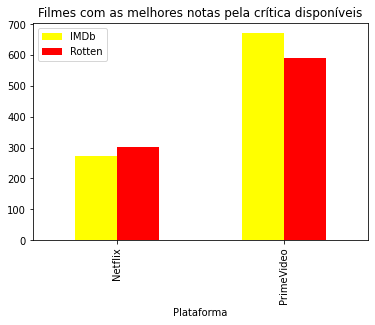

In [15]:
plataformaXavaliador.plot(kind='bar', 
                          x='Plataforma',                         
                          title='Filmes com as melhores notas pela crítica disponíveis', color=['yellow', 'red'])

Percebe-se que, em comparação com a Netflix, o Prime Video disponibiliza a maior parte dos 1000 filmes mais bem avaliados, tanto pelo IMDb quanto pelo Rotten Tomatoes. Logo, esse não pode ser o fator que define a maior popularidade da Netflix.

## Exclusividade
Talvez um fator decisivo de popularidade seja a exclusividade de produtos. Para ter noção disso, é possível analisar a quantidade de produções originais (logo, exclusivas) que cada plataforma possui.

Infelizmente não existe uma base de dados de fácil acesso que contenha esse tipo de dado, portanto, é  necessário extraí-los por meio de web scraping:

In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
# link da netflix somente com as produções originais
url_net = 'https://www.netflix.com/br-en/browse/genre/839338'
pageNetflix = requests.get(url_net) # requisição da página
pageNetflix

<Response [200]>

In [18]:
# instanciando a página com BeautifulSoup para poder manipulá-la
paginaNetflix = BeautifulSoup(pageNetflix.content, 'html.parser')

In [19]:
# encontrando os títulos na página
tagsOriginaisNetflix = paginaNetflix.find_all('span', class_='nm-collections-title-name')

In [20]:
# lista com todos os títulos originais Netflix disponíveis no catálogo
originaisNetflix = []

for tag in tagsOriginaisNetflix:
    originaisNetflix.append(tag.get_text())


In [21]:
# link de uma página wikipedia contendo uma tabela de títulos originais Prime
url_prime = 'https://pt.wikipedia.org/wiki/Lista_de_programas_originais_distribu%C3%ADdos_pela_Amazon'
pagePrime = requests.get(url_prime)
pagePrime

<Response [200]>

In [22]:
# encontrando os títulos na página
sopaPrime = BeautifulSoup(pagePrime.content, 'html.parser')
tables = sopaPrime.find_all('table')

for t in tables:
     tagsPrime = t.find_all('i')

In [23]:
# lista com todos os títulos originais Prime Video disponíveis 
originaisPrime = []

for tag in tagsPrime:
    originaisPrime.append(tag.get_text())



In [24]:
# junção de todos os títulos
todosOriginais = originaisNetflix + originaisPrime

In [25]:
dic = {'Title': todosOriginais}

prodOriginais = pd.DataFrame(dic)
prodOriginais

,Title
0,Bridgerton
1,Cobra Kai
2,Lupin
3,Peaky Blinders
4,Lucifer
...,...
1285,Crisis in Six Scenes
1286,Britannia
1287,Falco
1288,Good Omens


In [26]:
prodOriginais['Production'] = None

for l in range(len(prodOriginais['Title'])):
    if prodOriginais['Title'][l] in originaisNetflix:
        prodOriginais['Production'][l] = 'Netflix'
    if prodOriginais['Title'][l] in originaisPrime:
        prodOriginais['Production'][l] = 'Prime Video'

prodOriginais

,Title,Production
0,Bridgerton,Netflix
1,Cobra Kai,Netflix
2,Lupin,Netflix
3,Peaky Blinders,Netflix
4,Lucifer,Netflix
...,...,...
1285,Crisis in Six Scenes,Prime Video
1286,Britannia,Prime Video
1287,Falco,Prime Video
1288,Good Omens,Prime Video


In [27]:
# contagem de produções originais por plataforma
prodOriginais['Production'].value_counts()

Netflix        1263
Prime Video      27
Name: Production, dtype: int64

<AxesSubplot:title={'center':'Nº de produções originais por plataforma'}>

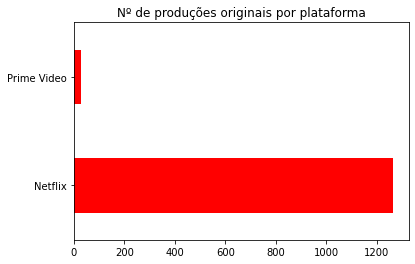

In [28]:
prodOriginais['Production'].value_counts().plot(kind='barh', title='Nº de produções originais por plataforma', color='red')

É notável a diferença de quantidade no quesito produções originais entre as duas plataformas. A Netflix assume um patamar superior ao Prime Video, disponibilizando mais conteúdo exclusivo, que pode ser decisivo para atrair mais usuários. Visto isso, é importante considerar a produção de mais títulos originais por parte da Amazon.

## Análise interativa

In [29]:
%%HTML

<iframe width="1000" height="600" src="https://app.powerbi.com/view?r=eyJrIjoiNzc2NDAxZTYtMTc2Yy00ZmUzLTgwYmQtNjczMzZlMWZiYWNkIiwidCI6ImY4OTZmYTg3LTQ5MzgtNGQxNS1iNjk1LTA3ZTYwNzhhMWJkMyJ9" frameborder="0" allowFullScreen="true"></iframe>

## Propostas
- **Investir em mais produções originais:**
Este pode ser um fator atrativo para os usuários de serviços de streaming, produções de qualidade e bem avaliadas pela crítica agregam à imagem da plataforma.


- **Direcionar o marketing e propaganda da plataforma para essas produções:**
Tão importante quanto investir em ideias originais, é fazer com que elas sejam notadas. Anúncios em plataformas como YouTube e Twitch são vantajosos por atingirem um grande público com frequência.


- **Reforçar estratégias existentes:**
Tornar mais visível a estratégia de "frete grátis" e "entrega rápida" para quem é assinante do Prime Video, visando atingir mais clientes em potencial.
